# Quick check of agro datasets exploitability for LeWagon MLProject

- availability of features data: parcels, type of soils, type of crop, weather, sequencial etc
- availability of target data: production (yearly)
- quality of data: nan, length of time series

**TODO**

- list datasets
- links between datasets
- size of datasets
- other datasets?
- objectives

## Objectives

- predict annual crop production per year and per region/parcel
- compare predicted annual production to annual crop consumption per region/parcel
- forecast under production and over production
- infer transport requirement for satisfying demand
- update crop production forecast with weather data
- update crop production with satellite images
- importations vs exportations

## Possible extensions

- get market data, market forecast to compute expectable value

<https://agreste.agriculture.gouv.fr/agreste-web/>

In [3]:
# ML libs
import pandas as pd
# Utils
import os

# 
datasets_dir = "/home/ken/Datasets/Agriculture"

In [17]:
file_name = "cd2023-19_ResultatsDéfinifs-FranceEntiere2021-2022_maj22nov2023.xlsx"
file_path = os.path.join(datasets_dir,file_name)
data = pd.read_excel(file_path, sheet_name=None)

In [83]:
def format_ssa_sommaire_df(ssa_excel_dict):
    ssa_excel_dict['Sommaire']  = ssa_excel_dict['Sommaire'].dropna(how="all").dropna(axis=1)
    ssa_excel_dict['Sommaire'].rename(columns=dict(zip(ssa_excel_dict['Sommaire'].columns, ['Tableaux', 'Onglets'])), inplace=True)
    ssa_excel_dict['Sommaire']['Onglets'] = ssa_excel_dict['Sommaire']['Onglets'].str.strip('#')
    ssa_excel_dict['Sommaire'].drop(2, inplace=True)
    ssa_excel_dict['Sommaire'].set_index("Tableaux", inplace=True)

In [85]:
ssa2023_dict = data.copy()
format_ssa_sommaire_df(ssa2023_dict)

In [86]:
COP = ssa2023_dict[ssa2023_dict['Sommaire'].iloc[0]['Onglets']]
COP

,SAA 2021 - 2022 définitive,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France entière
1,"Céréales, oléagineux et protéagineux",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Superficie développée,NaN,NaN,Rendement,NaN,Production récoltée,NaN,NaN
3,Cultures,(ha),NaN,NaN,(100 kg/ha),NaN,(tonne),NaN,NaN
4,NaN,NaN,NaN,Indice,NaN,NaN,NaN,NaN,Indice
5,NaN,2021,2022.0,22/21,2021,2022.0,2021,2022.0,22/21
6,Céréales (y c. semences),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Blé tendre d'hiver,4960464,4671845.0,94.2,71.1,71.8,35250487.4,33537918.8,95.1
8,Blé tendre de printemps,22042,25052.0,113.7,66.2,62.2,145992.2,155906.9,106.8
9,Total blé tendre,4982506,4696897.0,94.3,71,71.7,35396479.6,33693825.7,95.2


In [72]:
len(COP)

55

In [ ]:
file_name = "SAA_2010-2023_provisoires_donnees_regionales.xlsx"
file_path = os.path.join(datasets_dir, file_name)
SAA_regionales = pd.read_excel(file_path, sheet_name=None)

In [98]:
SAA_regionales['COP']

,Statistique agricole annuelle par région administrative : séries 2010 - 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,Les superficies développées sont exprimées en ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Données arrêtées au 29/03/2024. Données 2023 p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source : Agreste - Statistique agricole annuel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIB_REG2,LIB_CODE,SURF_2010,SURF_2011,SURF_2012,SURF_2013,SURF_2014,SURF_2015,SURF_2016,SURF_2017,...,PROD_2014,PROD_2015,PROD_2016,PROD_2017,PROD_2018,PROD_2019,PROD_2020,PROD_2021,PROD_2022,PROD_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,976 - Mayotte,42 - Mélange de pois,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
901,976 - Mayotte,43 - Pois chiches (y compris semences),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902,976 - Mayotte,44 - Lupin doux,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,976 - Mayotte,45 - Autres protéagineux,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,108,108


In [99]:
file_name = "SAA_2010-2023_provisoires_donnees_departementales.xlsx"
file_path = os.path.join(datasets_dir, file_name)
SAA_departementales = pd.read_excel(file_path, sheet_name=None)

In [100]:
SAA_departementales.keys()

dict_keys(['Sommaire', 'COP', 'FOU', 'IND', 'PDT', 'LEG', 'FRT', 'FLR', 'VIG', 'VIN', 'TER', 'EFA', 'PRA', 'LAI'])

In [106]:
SAA_departementales['COP'].drop([0,1,2,3]).describe()

,Statistique agricole annuelle par département : séries 2010 - 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,4501,4501,4501,4401,4401,4401,4401,4401,4401,4401,...,4501,4501,4501,4501,4501,4501,4501,4501,4501,4300
unique,19,101,46,1717,1501,1478,1469,1544,1572,1568,...,2402,2398,2408,2509,2503,2580,2636,2632,2685,2694
top,76 - Occitanie,056 - Morbihan,24 - Riz indica,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,585,45,100,1437,1403,1397,1383,1374,1367,1279,...,1387,1380,1292,1239,1210,1203,1019,1022,1074,868


In [10]:
dir_name = "RPG/Projet_carto_RPG_2"
dir_path = os.path.join(datasets_dir, dir_name)
files_list = os.listdir(dir_path)
files_list

['Projet_carto_RPG_2-1_MTQ.qgs',
 'Projet_carto_RPG_2-1_MTQ.mxd',
 'Projet_carto_RPG_2-1_FXX.qgs',
 'Projet_carto_RPG_2-1_REU.mxd',
 'Projet_carto_RPG_2-1_MYT.qgs',
 'Projet_carto_RPG_2-1_GLP.mxd',
 'Projet_carto_RPG_2-1_FXX.mxd',
 'Projet_carto_RPG_2-1_GLP.qgs',
 'Projet_carto_RPG_2-1_GUF.qgs',
 'Projet_carto_RPG_2-1_GUF.mxd',
 'Projet_carto_RPG_2-1_REU.qgs',
 'Projet_carto_RPG_2-1_MYT.mxd']

In [8]:
import xml.etree.ElementTree as ET

In [20]:
xml_file = os.path.join(dir_path, "Projet_carto_RPG_2-1_FXX.qgs")
tree = ET.parse(xml_file)


In [21]:
root = tree.getroot()

In [22]:
print(root.tag)
for child in root:
    print(child.tag, child.attrib)

qgis
homePath {'path': ''}
title {}
autotransaction {'active': '0'}
evaluateDefaultValues {'active': '0'}
trust {'active': '0'}
projectCrs {}
layer-tree-group {}
snapping-settings {'enabled': '0', 'intersection-snapping': '0', 'unit': '1', 'mode': '2', 'type': '1', 'tolerance': '12'}
relations {}
mapcanvas {'name': 'theMapCanvas', 'annotationsVisible': '1'}
projectModels {}
legend {'updateDrawingOrder': 'true'}
mapViewDocks {}
mapViewDocks3D {}
projectlayers {}
layerorder {}
properties {}
visibility-presets {}
transformContext {}
projectMetadata {}
Annotations {}
Layouts {}
Bookmarks {}
ProjectViewSettings {'UseProjectScales': '0'}
ProjectDisplaySettings {}


In [32]:
map_layer = root.find("projectlayers").find("maplayer")
for child in map_layer:
    print(child.tag, child.attrib)
    child.

id {}
datasource {}
keywordList {}
layername {}
srs {}
resourceMetadata {}
provider {'encoding': 'System'}
vectorjoins {}
layerDependencies {}
dataDependencies {}
legend {'type': 'default-vector'}
expressionfields {}
map-layer-style-manager {'current': 'défaut'}
auxiliaryLayer {}
flags {}
renderer-v2 {'forceraster': '0', 'enableorderby': '0', 'symbollevels': '0', 'type': 'categorizedSymbol', 'attr': 'CODE_GROUP'}
customproperties {}
blendMode {}
featureBlendMode {}
layerOpacity {}
SingleCategoryDiagramRenderer {'attributeLegend': '1', 'diagramType': 'Histogram'}
DiagramLayerSettings {'dist': '0', 'showAll': '1', 'priority': '0', 'zIndex': '0', 'linePlacementFlags': '18', 'placement': '1', 'obstacle': '0'}
geometryOptions {'geometryPrecision': '0', 'removeDuplicateNodes': '0'}
referencedLayers {}
referencingLayers {}
fieldConfiguration {}
aliases {}
excludeAttributesWMS {}
excludeAttributesWFS {}
defaults {}
constraints {}
constraintExpressions {}
expressionfields {}
attributeactions {}

In [49]:
from bs4 import BeautifulSoup

with open(xml_file) as fp:
    soup = BeautifulSoup(fp,'lxml')

In [60]:
soup.find_all('field')

[<field name="ID_PARCEL">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field name="SURF_PARC">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field name="CODE_CULTU">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field name="CODE_GROUP">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field name="CULTURE_D1">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field name="CULTURE_D2">
 <editwidget type="TextEdit">
 <config>
 <option></option>
 </config>
 </editwidget>
 </field>,
 <field editable="1" name="CODE_CULTU"></field>,
 <field editable="1" name="CODE_GROUP"></field>,
 <field editable="1" name="CULTURE_D1"></field>,
 <field editable="1" name="CULTURE_D2"></field>,
 <field editable="1" name="ID_PARCEL"></field>,
 <field editable="1"

In [65]:
json_name = "RPG/rpg-2020-registre-parcellaire-graphique.json"
json_path = os.path.join(datasets_dir, json_name)
import json
with open(json_path, "r") as file:
    js = json.load(file)

In [70]:
js_small = js[:100]
js_small

[{'geo_point_2d': {'lon': -1.0722637006190943, 'lat': 43.20029146325354},
  'geo_shape': {'type': 'Feature',
   'geometry': {'coordinates': [[[-1.072787097473588, 43.199925842369574],
      [-1.072909695036209, 43.19994340787417],
      [-1.072726371561151, 43.20071850403112],
      [-1.072494553552902, 43.20071536957109],
      [-1.072310745422173, 43.20070150478417],
      [-1.072145106273729, 43.20065723073562],
      [-1.071922816598643, 43.20055862208148],
      [-1.071770446301621, 43.200472234462275],
      [-1.071726788590708, 43.200429298579024],
      [-1.071690607056119, 43.20037715453977],
      [-1.071542380671366, 43.20023413676159],
      [-1.071407644725376, 43.20005196980063],
      [-1.072787097473588, 43.199925842369574]]],
    'type': 'Polygon'},
   'properties': {}},
  'anon_id': '19c955509e22f6c0dcd8a8a5e0a6e27f9797c67ef8e7b247',
  'millesime': '2020',
  'bio': 'Oui.000',
  'code_cultu': 'PTR',
  'lbl_cultu': 'Autre prairie temporaire de 5 ans ou moins',
  'grp_cu

TypeError: 'NoneType' object is not subscriptable

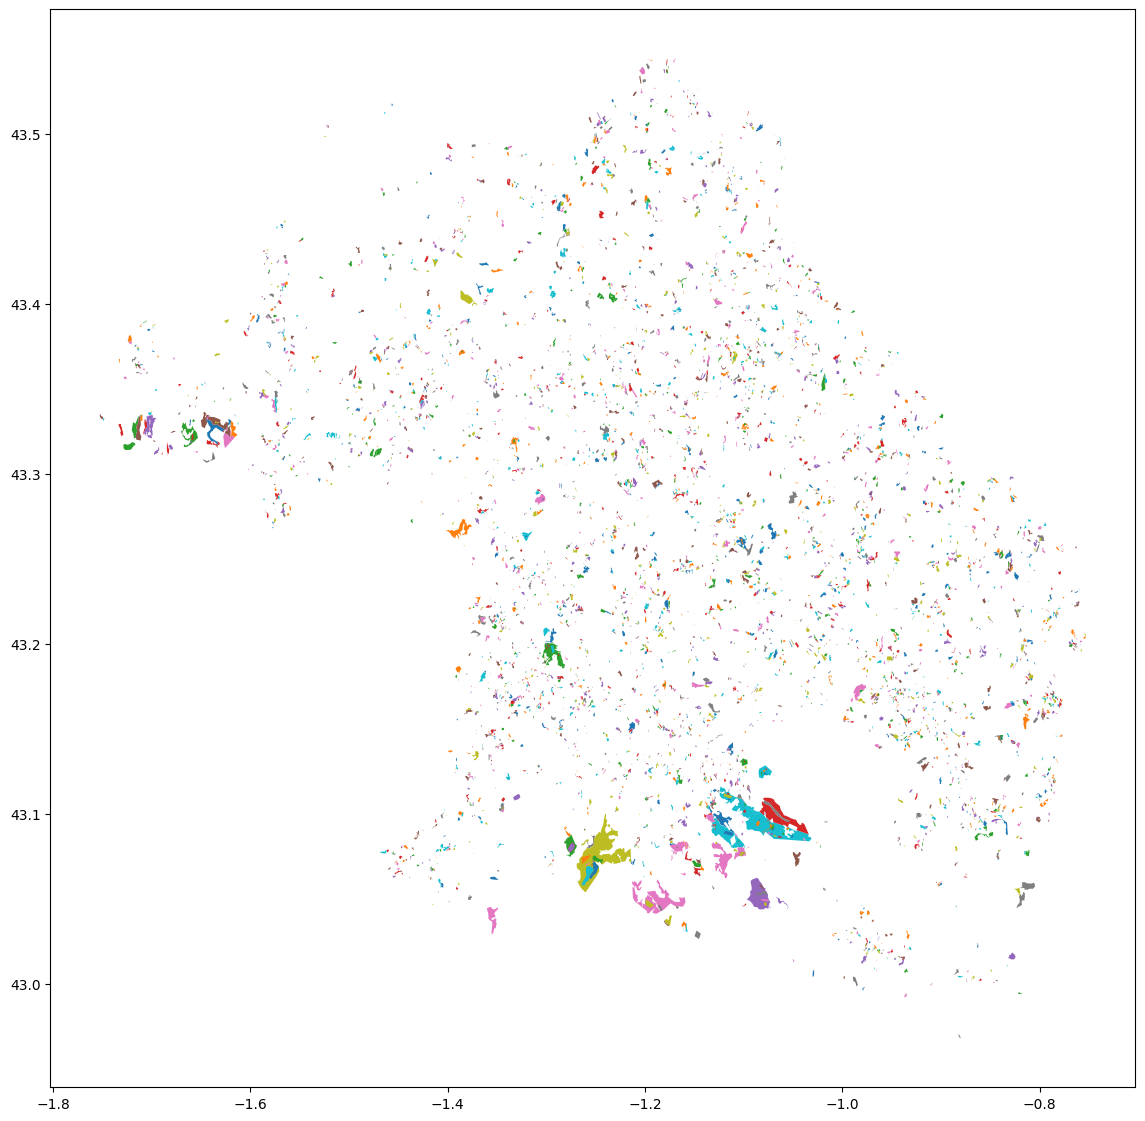

In [175]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,14))
#plt.xlim(-5.15,9.57)
#plt.ylim(41.32,51.10)
for i, parcel in enumerate(js):
    polygons = parcel['geo_shape']['geometry']['coordinates']
    #print(f"index = {i}")
    for polygon in polygons:
        ax.fill(np.array(polygon)[:,0], np.array(polygon)[:,1], label=parcel['code_cultu'])
    #ax.plot(np.array(polygon)[:,:,0][0], np.array(polygon)[:,:,1][0], linewidth=3, color="w")

In [142]:
js_small[48]

{'geo_point_2d': {'lon': -0.9872361710365216, 'lat': 43.27966261466281},
 'geo_shape': {'type': 'Feature',
  'geometry': {'coordinates': [[[-0.988650893985817, 43.28061033317653],
     [-0.988517460318384, 43.28064285017408],
     [-0.988401177035953, 43.280660430427204],
     [-0.988273296292308, 43.28065186819387],
     [-0.988187030051122, 43.28064483128221],
     [-0.988044304161985, 43.28061057961956],
     [-0.98790205374191, 43.28056234935007],
     [-0.987630646389328, 43.28042045079656],
     [-0.987437849546093, 43.280322647472154],
     [-0.987195788451079, 43.28022053808742],
     [-0.987011775391275, 43.28014864714059],
     [-0.986560366658175, 43.279992603772044],
     [-0.986572200230442, 43.27994107019929],
     [-0.986683186296343, 43.27998701567087],
     [-0.986692239555403, 43.27997210810973],
     [-0.986693256085634, 43.27997236781155],
     [-0.986734570918145, 43.27990237129502],
     [-0.986863546143419, 43.27968402656624],
     [-0.98648365342006, 43.27955736

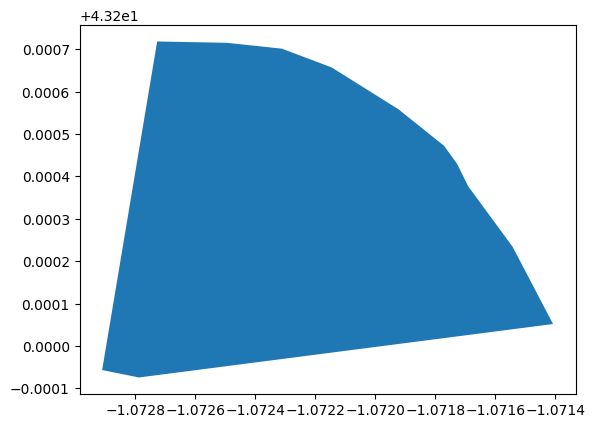

In [149]:
polygon = js_small[0]['geo_shape']['geometry']['coordinates'][0]
plt.fill(np.array(polygon)[:,0], np.array(polygon)[:,1])
#plt.plot(np.array(polygon)[:,:,0][0], np.array(polygon)[:,:,1][0], linewidth=3, color="w")

In [148]:
np.array(polygon)[:,0]

array([-1.0727871 , -1.0729097 , -1.07272637, -1.07249455, -1.07231075,
       -1.07214511, -1.07192282, -1.07177045, -1.07172679, -1.07169061,
       -1.07154238, -1.07140764, -1.0727871 ])

In [168]:
np.array(js[:]['code_cultu']).nunique()

TypeError: list indices must be integers or slices, not str

In [172]:
codes_cultu = set([parcel['code_cultu'] for parcel in js])

In [173]:
len(codes_cultu)

95